In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = 30
pd.options.display.float_format = "{:.2f}".format


In [ ]:
df = pd.read_csv("movies_complete.csv", parse_dates= ["release_date"])

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.genres[1]

In [ ]:
df.cast[1]

In [ ]:
df.describe()

In [ ]:
df.hist(figsize = (20, 12), bins = 100)
plt.show()

In [ ]:
df.budget_musd.value_counts(dropna = False).head(20)

In [ ]:
df.revenue_musd.value_counts(dropna = False).head(20)

In [ ]:
df.vote_average.value_counts(dropna= False)

In [ ]:
df.vote_count.value_counts()

In [ ]:
df.describe(include= "object")

In [ ]:
df[df.title == "Cinderella"]

The best and the worst movies...

In [ ]:
import IPython
from IPython.display import HTML

In [ ]:
df_best = df[["poster_path", "title", "budget_musd", "revenue_musd", "vote_count",
               "vote_average", "popularity"]].copy()

df_best

In [ ]:
df_best["profit_musd"] = df.revenue_musd.sub(df.budget_musd)
df_best["return"] = df.revenue_musd.div(df.budget_musd)

In [ ]:
df_best

In [ ]:
df_best.columns = ["", "Title", "Budget", "Revenue", "Votes",
                   "Average Rating", "Popularity", "Profit", "ROI"]

In [ ]:
df_best.set_index("Title", inplace= True)

In [ ]:
df_best

In [ ]:
df_best.iloc[0, 0]

In [ ]:
subset = df_best.iloc[:5, :2]
subset

In [ ]:
HTML(subset.to_html(escape= False))

In [ ]:
df_best.sort_values(by= "Average Rating", ascending= False)

In [ ]:
df_best.sort_values(by= "ROI", ascending= False)

In [ ]:
df_best.loc[df_best.Budget >= 5].sort_values(by = "ROI", ascending = False)

In [ ]:
df_best.Budget.fillna(0, inplace= True)
df_best.Votes.fillna(0, inplace= True)

In [ ]:
df_best.info()

In [ ]:
def best_worst(n, by, ascending = False, min_bud = 0, min_votes = 0):

    df2 = df_best.loc[(df_best.Budget >= min_bud) & (df_best.Votes >= min_votes), 
                      ["", by]].sort_values(by = by, ascending = ascending).head(n).copy()
    
    return HTML(df2.to_html(escape= False))

THE BEST AND THE WORST MOVIES.. ANSWER


In [ ]:
# Movies Top 5 - Highest Revenue

best_worst(n = 5, by = "Revenue")

In [ ]:
# Movies Top 5 - Highest Budget

best_worst(5, "Budget")

In [ ]:
# Movies Top  5 - Highest Profit

best_worst(5, "Profit")

In [ ]:
# Movies Top 5 - Lowest Profit 

best_worst(5, "Profit", ascending = True)

In [ ]:
# Movies Top 5 - Highest ROI

best_worst(5, "ROI", min_bud = 50)

In [ ]:
# Movies Top 5 - Lowest ROI

best_worst(5, "ROI", ascending= True, min_bud= 100)

In [ ]:
# Movies Top 5 - Most Votes

best_worst(5, "Votes")

In [ ]:
# Movies Top 5 - Highest Rating

best_worst(5, "Average Rating", min_votes = 1000)

In [ ]:
# Movies Top 5 - Lowest Rating 

best_worst(5, "Average Rating", ascending = True, min_votes = 1000)

In [ ]:
best_worst(5, "Average Rating", ascending = True, min_votes = 1000, min_bud= 10)

In [ ]:
# Movies Top 5 - Most Popular

best_worst(5, "Popularity")

FIND YOUR NEXT MOVIE   

Search 1: Science Fiction Action Movie with Bruce Willis (high rating)

In [ ]:
df.genres[0]

In [ ]:
mask_genres = df.genres.str.contains("Action") & df.genres.str.contains("Science Fiction")
mask_genres

In [ ]:
df.cast[0]

In [ ]:
mask_actor = df.cast.str.contains("Bruce Willis")
mask_actor

In [ ]:
df.loc[mask_actor & mask_genres, ["title", "vote_average"]].sort_values(by = "vote_average", ascending = False)

In [ ]:
bruce = df.loc[mask_actor & mask_genres, ["title", "poster_path", "vote_average"]].sort_values(by = "vote_average", ascending = False)

HTML(bruce.to_html(escape = False))

Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (low runtime)

In [ ]:
df.director

In [ ]:
mask_director  = df.director == "Quentin Tarantino"

In [ ]:
mask_actor = df.cast.str.contains("Uma Thurman")

In [ ]:
quentin = df.loc[mask_director & mask_actor, 
                 ["title", "poster_path", "runtime"]].sort_values(by = "runtime").set_index("title")

HTML(quentin.to_html(escape= False))

Search 3: Most Successful Pixar Studio Movie between 2010 and 2015 (high revenue)

In [ ]:
df.production_companies

In [ ]:
mask_studios = df.production_companies.str.contains("Pixar").fillna(False)

In [ ]:
df.release_date

In [ ]:
mask_time = df.release_date.between("2010-01-01", "2015-12-31")

In [ ]:
pixar = df.loc[mask_studios & mask_time, 
               ["title", "poster_path", "revenue_musd", "release_date"]].sort_values(by = "revenue_musd", ascending= False).set_index("title")

HTML(pixar.to_html(escape = False))

Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent)

In [ ]:
mask_genre = df.genres.str.contains("Action") | df.genres.str.contains("Thriller")

In [ ]:
mask_lan = df.original_language == "en"

In [ ]:
mask_vote_av = df.vote_average >= 7.5

In [ ]:
mask_vote_co = df.vote_count >= 100

In [ ]:
next_mov = df.loc[mask_genre & mask_lan & mask_vote_av & mask_vote_co, 
                  ["title", "poster_path", "genres", "vote_average", "vote_count", "release_date"]].sort_values("release_date", ascending= False).set_index("title").head(20)

HTML(next_mov.to_html(escape = False))

What are the most common Words in Movie Titles and Taglines ?

In [ ]:
from wordcloud import WordCloud

In [ ]:
df

In [187]:
df.tagline[1]

'Roll the dice and unleash the excitement!'

In [188]:
df.overview[1]

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."

In [189]:
title = df.title.dropna()
overview = df.overview.dropna()
tagline = df.tagline.dropna()

In [190]:
title

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
44686                         Subdue
44687            Century of Birthing
44688                       Betrayal
44689               Satan Triumphant
44690                       Queerama
Name: title, Length: 44691, dtype: object

In [191]:
" ".join(title)

'Toy Story Jumanji Grumpier Old Men Waiting to Exhale Father of the Bride Part II Heat Sabrina Tom and Huck Sudden Death GoldenEye The American President Dracula: Dead and Loving It Balto Nixon Cutthroat Island Casino Sense and Sensibility Four Rooms Ace Ventura: When Nature Calls Money Train Get Shorty Copycat Assassins Powder Leaving Las Vegas Othello Now and Then Persuasion The City of Lost Children Shanghai Triad Dangerous Minds Twelve Monkeys Wings of Courage Babe Carrington Dead Man Walking Across the Sea of Time It Takes Two Clueless Cry, the Beloved Country Richard III Dead Presidents Restoration Mortal Kombat To Die For How To Make An American Quilt Se7en Pocahontas When Night Is Falling The Usual Suspects Guardian Angel Mighty Aphrodite Lamerica The Big Green Georgia Kids of the Round Table Home for the Holidays The Postman The Confessional The Indian in the Cupboard Eye for an Eye Mr. Holland\'s Opus Don\'t Be a Menace to South Central While Drinking Your Juice in the Hood T

In [192]:
title_corpus =  " ".join(title)
overview_corpus = " ".join(overview)
tagline_corpus = " ".join(tagline)

In [193]:
tagline_corpus

'Roll the dice and unleash the excitement! Still Yelling. Still Fighting. Still Ready for Love. Friends are the people who let you be yourself... and never let you forget it. Just When His World Is Back To Normal... He\'s In For The Surprise Of His Life! A Los Angeles Crime Saga You are cordially invited to the most surprising merger of the year. The Original Bad Boys. Terror goes into overtime. No limits. No fears. No substitutes. Why can\'t the most powerful man in the world have the one thing he wants most? Part Dog. Part Wolf. All Hero. Triumphant in Victory, Bitter in Defeat. He Changed the World, But Lost a Nation. The Course Has Been Set. There Is No Turning Back. Prepare Your Weapons. Summon Your Courage. Discover the Adventure of a Lifetime! No one stays at the top forever. Lose your heart and come to your senses. Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who\'s in for the wildest New year\'s Eve of his life. New ani

In [195]:
title_wordcloud = WordCloud(background_color="white", height=2000, width=4000, max_words=200).generate(title_corpus)

title_wordcloud

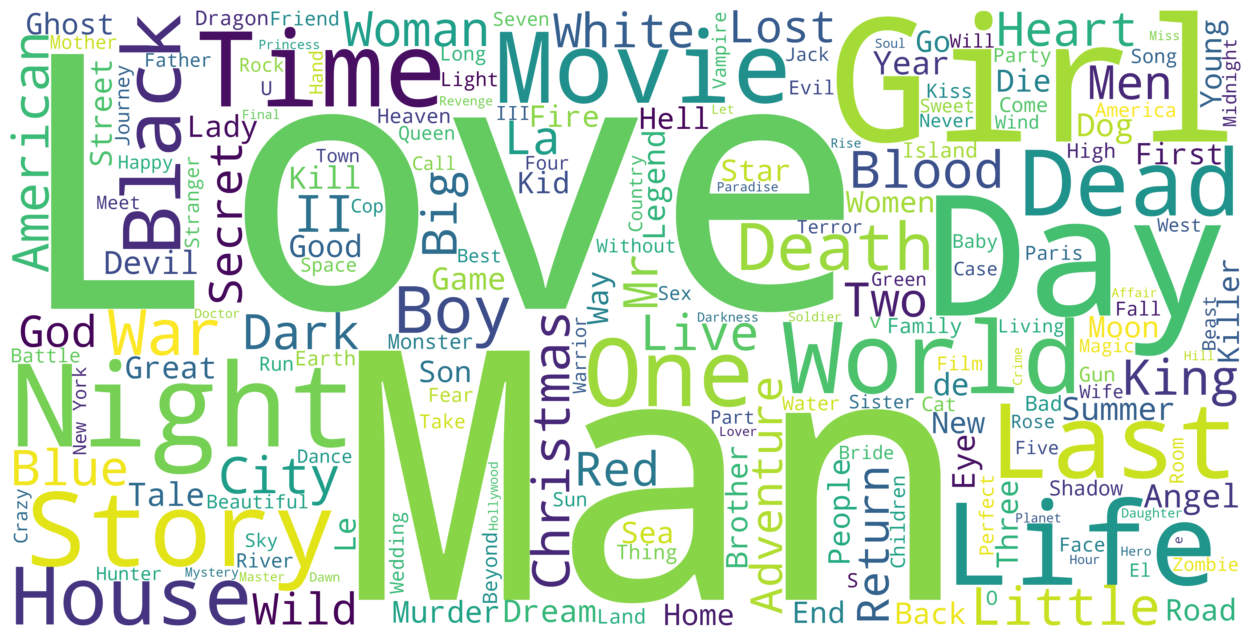

In [197]:
plt.figure(figsize=(16, 8))
plt.imshow(title_wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

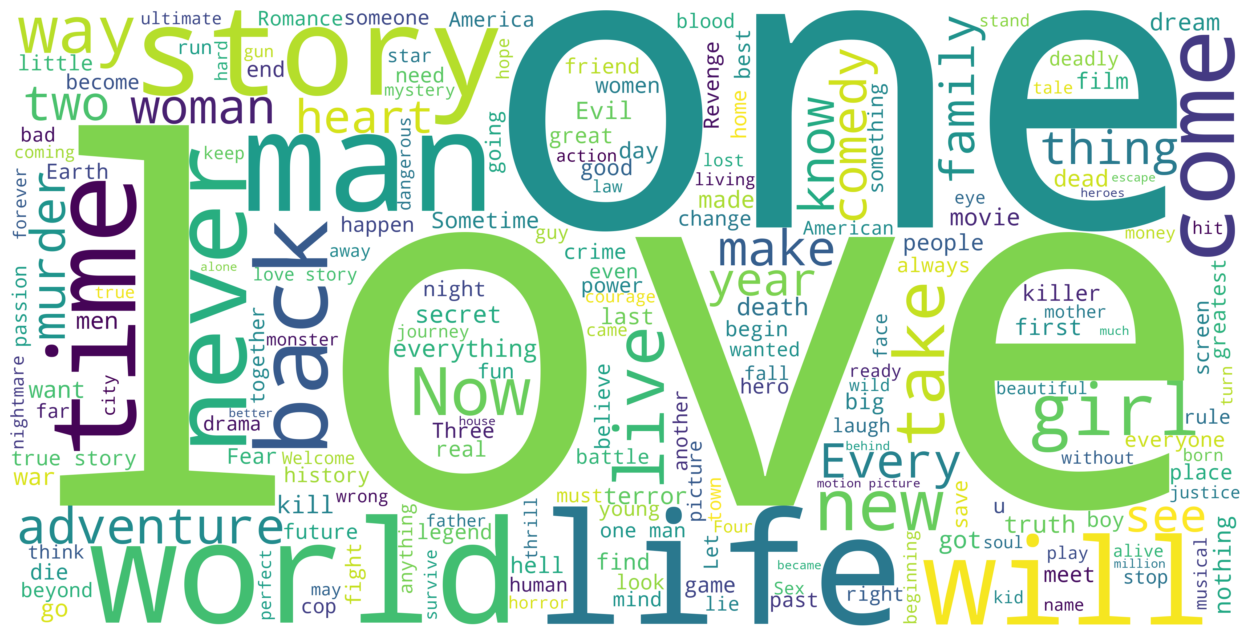

In [199]:
tagline_wordcloud = WordCloud(background_color="white", height=2000, width=4000).generate(tagline_corpus)
plt.figure(figsize=(16, 8))
plt.imshow(tagline_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

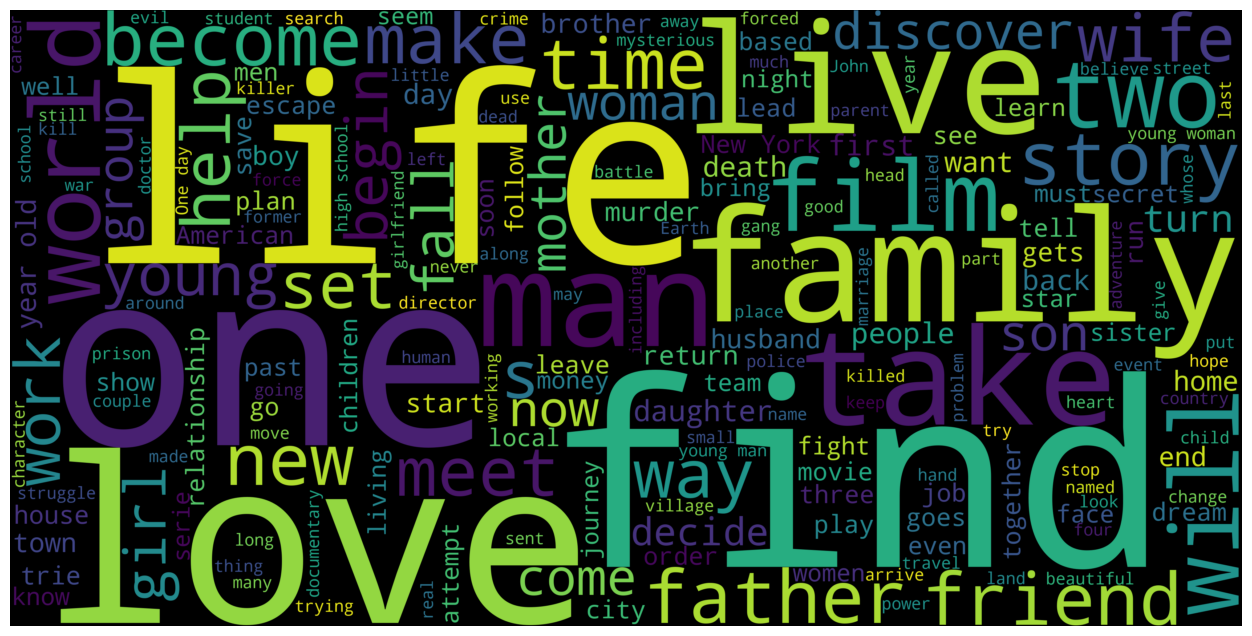

In [201]:
overview_wordcloud = WordCloud(background_color="black", height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16, 8))
plt.imshow(overview_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()